In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
import os
import pandas as pd
from scipy.stats import norm
import sys
import yaml
sys.path.append("../src")  # add parent directory to Python path
from PostProcessing import ResultsProcessor, ResultsVisualizer

In [15]:
data_path = "../../02_Data/"
output_path = "../../03_Output/"

In [3]:
prelim_runs_n_path = data_path + "sim_output_20251118a/"

prelim_runs_n = {
    "n=24":pd.read_parquet(prelim_runs_n_path + "results_prelim_base_n24_T2.parquet"),
    "n=33":pd.read_parquet(prelim_runs_n_path + "results_prelim_base_n33_T2.parquet"),
    "n=66":pd.read_parquet(prelim_runs_n_path + "results_prelim_base_n66_T2.parquet"),
    "n=99":pd.read_parquet(prelim_runs_n_path + "results_prelim_base_n99_T2.parquet"),
    "n=198":pd.read_parquet(prelim_runs_n_path + "results_prelim_base_n198_T2.parquet"),
    "n=300":pd.read_parquet(prelim_runs_n_path + "results_prelim_base_n300_T2.parquet"),
    "n=600":pd.read_parquet(prelim_runs_n_path + "results_prelim_base_n600_T2.parquet")
}

prelim_runs_rho_path = data_path + "sim_output_20251118a/"

prelim_runs_rho = {
    "rho=0.0":pd.read_parquet(prelim_runs_rho_path + "results_prelim_base_n99_T10_rho00.parquet"),
    "rho=0.1":pd.read_parquet(prelim_runs_rho_path + "results_prelim_base_n99_T10_rho01.parquet"),
    "rho=0.2":pd.read_parquet(prelim_runs_rho_path + "results_prelim_base_n99_T10_rho02.parquet"),
    "rho=0.3":pd.read_parquet(prelim_runs_rho_path + "results_prelim_base_n99_T10_rho03.parquet"),
    "rho=0.4":pd.read_parquet(prelim_runs_rho_path + "results_prelim_base_n99_T10_rho04.parquet"),
    "rho=0.5":pd.read_parquet(prelim_runs_rho_path + "results_prelim_base_n99_T10_rho05.parquet"),
    "rho=0.6":pd.read_parquet(prelim_runs_rho_path + "results_prelim_base_n99_T10_rho06.parquet"),
    "rho=0.7":pd.read_parquet(prelim_runs_rho_path + "results_prelim_base_n99_T10_rho07.parquet")
}


prelim_runs_T_path = data_path + "sim_output_20251125/"

prelim_runs_T = {
    "n=24":pd.read_parquet(prelim_runs_T_path + "results_prelim_base_n24_T100.parquet"),
    "n=33":pd.read_parquet(prelim_runs_T_path + "results_prelim_base_n33_T100.parquet"),
    "n=66":pd.read_parquet(prelim_runs_T_path + "results_prelim_base_n66_T100.parquet")
}

In [4]:
def create_raw_summary_tables(raw_results_dict):
    Output = {}
    for setting in raw_results_dict.keys():
        processed_results = ResultsProcessor(raw_results_dict[setting])
        visualizer = ResultsVisualizer(processed_results)
        Output[setting] = visualizer.create_basic_summary_table()
    return Output

def create_processed_table(raw_summary_table, estimand):
    rows = []
    for setting in raw_summary_table.keys():
        new_row = raw_summary_table[setting].loc[raw_summary_table[setting]["Estimand"]==estimand, ].copy()
        new_row["label"] = setting
        rows.append(new_row)
    return pd.concat(rows, ignore_index=True)

In [5]:
prelim_run_n_tables_raw = create_raw_summary_tables(prelim_runs_n)
prelim_run_rho_tables_raw = create_raw_summary_tables(prelim_runs_rho)

In [6]:
table_1a_raw = create_processed_table(prelim_run_n_tables_raw, "tau_[1]2(2-0,0-2)")
table_1b_raw = create_processed_table(prelim_run_n_tables_raw, "tau_2(2-0,0-2)")

In [7]:
# Table 1a
table_1a = table_1a_raw
table_1a["label_latex"] = "$" + table_1a["label"] + "$"
table_1a = table_1a.loc[:, ["label_latex", "Bias", "Coverage", "RMSE"]].rename(columns={"label_latex":"Sample Size"})
table_1a_latex = table_1a.to_latex(index=False, escape=False, column_format="cccc")
print(table_1a_latex)

\begin{tabular}{cccc}
\toprule
Sample Size & Bias & Coverage & RMSE \\
\midrule
$n=24$ & 0.02 (0.06) & 0.84 (0.01) & 17.07 \\
$n=33$ & -0.06 (0.05) & 0.89 (0.00) & 11.39 \\
$n=66$ & 0.02 (0.04) & 0.91 (0.00) & 6.29 \\
$n=99$ & -0.02 (0.03) & 0.94 (0.00) & 3.76 \\
$n=198$ & -0.01 (0.02) & 0.94 (0.00) & 2.02 \\
$n=300$ & -0.01 (0.02) & 0.94 (0.00) & 1.38 \\
$n=600$ & 0.02 (0.01) & 0.94 (0.00) & 0.67 \\
\bottomrule
\end{tabular}



In [9]:
# Table 1b
table_1b = table_1b_raw
table_1b["label_latex"] = "$" + table_1b["label"] + "$"
table_1b = table_1b.loc[:, ["label_latex", "Bias", "Coverage", "RMSE"]].rename(columns={"label_latex":"Sample Size"})
table_1b_latex = table_1b.to_latex(index=False, escape=False, column_format="cccc")
print(table_1b_latex)

\begin{tabular}{cccc}
\toprule
Sample Size & Bias & Coverage & RMSE \\
\midrule
$n=24$ & 0.04 (0.04) & 0.88 (0.00) & 8.52 \\
$n=33$ & -0.03 (0.04) & 0.89 (0.00) & 6.65 \\
$n=66$ & 0.02 (0.03) & 0.93 (0.00) & 3.15 \\
$n=99$ & -0.03 (0.02) & 0.94 (0.00) & 2.02 \\
$n=198$ & 0.00 (0.01) & 0.94 (0.00) & 1.02 \\
$n=300$ & -0.00 (0.01) & 0.95 (0.00) & 0.66 \\
$n=600$ & 0.02 (0.01) & 0.95 (0.00) & 0.33 \\
\bottomrule
\end{tabular}



In [10]:
processed_T_results = {}
T_results_visualizer = {}
for n in prelim_runs_T:
    processed_T_results[n] = ResultsProcessor(prelim_runs_T[n])
    T_results_visualizer[n] = ResultsVisualizer(processed_T_results[n])

In [28]:
table_2_raw = {}
table_2_raw_verbose = {}
for n in prelim_runs_T:
    table_2_raw[n] = T_results_visualizer[n].create_basic_summary_table(latex_formatting=False)
    table_2_raw_verbose[n] = T_results_visualizer[n].create_basic_summary_table_verbose(latex_formatting=False)

In [32]:
def analyze_tau_by_time(raw_summary_table, estimand, times=None):
    # Isolate rows that correspond to the tau estimand in question
    # tau denoted by tau(r,r')^t (where t is the maximum time of the average)
    temp_data = raw_summary_table.loc[raw_summary_table["Estimand"].apply(lambda x: x[:len(estimand)]==estimand), ].copy()
    temp_data["t"] = temp_data["Estimand"].apply(lambda x: int(x.split("^")[1]))
    temp_data = temp_data.sort_values("t", ascending=True).reset_index(drop=True)
    if times is not None:
        temp_data = temp_data.loc[temp_data["t"].isin(set(times)), ]
    return temp_data

In [33]:
for n in prelim_runs_T:
    print("************")
    print("*** " + n + " ***")
    print("************")
    print(analyze_tau_by_time(table_2_raw[n], "tau(2-0,0-2)", times=[1]+list(10*np.arange(1,11))))

************
*** n=24 ***
************
            Estimand          Bias     Coverage  RMSE    t
0     tau(2-0,0-2)^1  -0.02 (0.04)  0.88 (0.00)  8.11    1
9    tau(2-0,0-2)^10   0.00 (0.01)  0.94 (0.00)  0.84   10
19   tau(2-0,0-2)^20   0.00 (0.01)  0.95 (0.00)  0.41   20
29   tau(2-0,0-2)^30  -0.00 (0.01)  0.95 (0.00)  0.28   30
39   tau(2-0,0-2)^40  -0.00 (0.01)  0.95 (0.00)  0.21   40
49   tau(2-0,0-2)^50  -0.00 (0.01)  0.95 (0.00)  0.16   50
59   tau(2-0,0-2)^60  -0.01 (0.01)  0.95 (0.00)  0.14   60
69   tau(2-0,0-2)^70  -0.00 (0.00)  0.95 (0.00)  0.11   70
79   tau(2-0,0-2)^80  -0.00 (0.00)  0.95 (0.00)  0.10   80
89   tau(2-0,0-2)^90  -0.00 (0.00)  0.95 (0.00)  0.09   90
99  tau(2-0,0-2)^100   0.00 (0.00)  0.95 (0.00)  0.08  100
************
*** n=33 ***
************
            Estimand          Bias     Coverage  RMSE    t
0     tau(2-0,0-2)^1   0.08 (0.04)  0.89 (0.00)  6.70    1
9    tau(2-0,0-2)^10   0.01 (0.01)  0.94 (0.00)  0.67   10
19   tau(2-0,0-2)^20  -0.00 (0.01)  0

In [26]:
def create_tau_over_time_plot(raw_summary_table_verbose, estimand, metric_col, title="", 
                              times=None, plot_ci=True, alpha=0.05, ax=None, 
                              show_nominal_line=True, line_color="#00274C", label=None):
    temp_data = raw_summary_table_verbose.loc[raw_summary_table_verbose["Estimand"].apply(lambda x: x[:len(estimand)]==estimand), ].copy()
    temp_data["t"] = temp_data["Estimand"].apply(lambda x: int(x.split("^")[1]))
    temp_data = temp_data.sort_values("t", ascending=True).reset_index(drop=True)
    if times is not None:
        temp_data = temp_data.loc[temp_data["t"].isin(set(times)), ]
    t = temp_data["t"].to_numpy()
    metric = temp_data[metric_col].to_numpy()
    
    if ax is None:
        fig, ax = plt.subplots()
        
        
    if plot_ci:
        se = temp_data[metric_col+"_MC_se"].to_numpy()
        z_star = norm.ppf(1 - alpha / 2)
        lower_ci = metric - z_star*se
        upper_ci = metric + z_star*se
        
        ax.fill_between(t, lower_ci, upper_ci, color=line_color, alpha=0.1)
    if show_nominal_line:
        ax.axhline(1 - alpha, linestyle="--", linewidth=1, color="black")


    # Plot the line on top so it is visible over the shading
    ax.plot(t, metric, color=line_color, linewidth=1.5, label=label)

    ax.set_xlabel("Time", fontsize=18)
    ax.set_ylabel(metric_col, fontsize=18)
    if title!="":
        ax.set_title(title)

    return ax

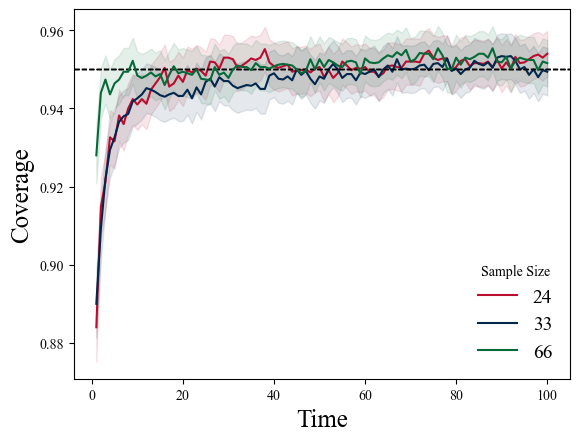

In [43]:
T_coverage_n24 = create_tau_over_time_plot(table_2_raw_verbose["n=24"], "tau(2-0,0-2)", "Coverage", line_color="#BA0C2F", label="24")
T_coverage_n_24_33 = create_tau_over_time_plot(table_2_raw_verbose["n=33"], "tau(2-0,0-2)", "Coverage", line_color="#00274C", 
                                               ax=T_coverage_n24, label="33")
T_coverage_n_24_33_66 = create_tau_over_time_plot(table_2_raw_verbose["n=66"], "tau(2-0,0-2)", "Coverage", line_color="#046A38", 
                                                  ax=T_coverage_n_24_33, label="66")
T_coverage_n_24_33_66
T_coverage_n_24_33_66.legend(fontsize=14, frameon=False, title="Sample Size")
file_name = "tau_T_coverage_n_24_33_66.pdf"
plt.savefig(output_path + file_name, format="pdf", bbox_inches="tight")

'tau_T_coverage_n24.pdf'

In [42]:
# Show that rho doesn't affect much in terms of performance
#print(prelim_run_rho_tables_raw)
for estimand in ["tau_2(2-0,0-2)", "tau_[1]2(2-0,0-2)", "tau(2-0,0-2)"]:
    print(create_processed_table(prelim_run_rho_tables_raw, estimand))

         Estimand          Bias     Coverage  RMSE    label
0  tau_2(2-0,0-2)  -0.04 (0.03)  0.94 (0.01)  2.06  rho=0.0
1  tau_2(2-0,0-2)  -0.03 (0.03)  0.94 (0.01)  2.02  rho=0.2
2  tau_2(2-0,0-2)  -0.07 (0.03)  0.94 (0.01)  2.07  rho=0.3
3  tau_2(2-0,0-2)  -0.04 (0.03)  0.95 (0.01)  2.03  rho=0.4
4  tau_2(2-0,0-2)  -0.09 (0.03)  0.94 (0.01)  2.15  rho=0.5
5  tau_2(2-0,0-2)  -0.04 (0.03)  0.93 (0.01)  2.42  rho=0.6
6  tau_2(2-0,0-2)  -0.00 (0.04)  0.94 (0.01)  2.52  rho=0.7
            Estimand          Bias     Coverage  RMSE    label
0  tau_[1]2(2-0,0-2)  -0.02 (0.04)  0.94 (0.01)  3.77  rho=0.0
1  tau_[1]2(2-0,0-2)  -0.13 (0.04)  0.93 (0.01)  3.95  rho=0.2
2  tau_[1]2(2-0,0-2)  -0.12 (0.05)  0.93 (0.01)  4.23  rho=0.3
3  tau_[1]2(2-0,0-2)  -0.11 (0.04)  0.94 (0.01)  3.97  rho=0.4
4  tau_[1]2(2-0,0-2)  -0.14 (0.05)  0.93 (0.01)  4.38  rho=0.5
5  tau_[1]2(2-0,0-2)  -0.05 (0.05)  0.93 (0.01)  4.74  rho=0.6
6  tau_[1]2(2-0,0-2)  -0.03 (0.05)  0.93 (0.01)  5.15  rho=0.7
       Estimand 